# Atividade Perceptron: Classificação de Petróleo

**Instituto Federal de Minas Gerais** 

*Engenharia de Computação*

*Aluno: Gabriel Henrique Silva Duque*

In [91]:
#importação de pacotes
import pandas as pd
import numpy as np
import pygwalker as pyg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

In [92]:
#funcoes
#degrau bipolar
def degrauBipolar(u): 
 if u >= 0:  
  y = 1
 else: 
  y = -1
 return y

#funcao que classifica a amostra com base na rede ja treinada 
def previsao(w, x):
 u = np.dot(w.T, x)
 yhat = degrauBipolar(u)
 return yhat

# IMPLEMENTAÇÃO DO PERCEPTRON

In [93]:
#PASSO 1: OBTER O CONJUNTO DE AMOSTRAS DE TREINAMENTO X 

#carregar a tabela de dados
dados = pd.read_csv("tabela_treino.csv", sep=";")

#analise exploratoria de dados
#walker = pyg.walk(dados)

In [94]:
#quantidade de elementos na amostra
n_amostras = dados.shape[0]
print(n_amostras)

#quantidade de variaveis de entrada (subtrair a coluna de tipo)
n_variaveis = dados.shape[1] - 1 
print(n_variaveis)

#separando os dados contendo apenas as variaveis de entrada 
x = dados.iloc[:, 0:n_variaveis].values
print(x)


30
4
[[ 1.00000e+00 -6.50800e-01  1.09700e-01  4.00090e+01]
 [ 2.00000e+00 -1.44920e+01  8.89600e-01  4.40050e+01]
 [ 3.00000e+00  2.08500e+00  6.87600e-01  7.98450e+01]
 [ 4.00000e+00  2.62600e-01  1.14760e+01  1.20710e+01]
 [ 5.00000e+00  6.41800e-01  1.02340e+01  7.79850e+01]
 [ 6.00000e+00  2.56900e-01  6.73000e-01  8.32650e+01]
 [ 7.00000e+00  1.11550e+01  6.04300e-01  7.44460e+01]
 [ 8.00000e+00  9.14000e-02  3.39900e-01  7.06770e+01]
 [ 9.00000e+00  1.21000e-02  5.25600e-01  4.63160e+01]
 [ 1.00000e+01 -4.29000e-02  4.66000e-01  5.43230e+01]
 [ 1.10000e+01  4.34000e-01  6.87000e-01  8.22870e+01]
 [ 1.20000e+01  2.73500e-01  1.02870e+01  7.19340e+01]
 [ 1.30000e+01  4.83900e-01  4.85100e-01  7.48500e+00]
 [ 1.40000e+01  4.08900e-01 -1.26700e-01  5.50190e+01]
 [ 1.50000e+01  1.43910e+01  1.61400e-01  8.58430e+01]
 [ 1.60000e+01 -9.11500e-01 -1.97300e-01  2.19620e+01]
 [ 1.70000e+01  3.65400e-01  1.04750e+01  7.48580e+01]
 [ 1.80000e+01  2.14400e-01  7.51500e-01  7.16990e+01]
 [ 1.

In [95]:
#inserindo o bias 
bias = np.ones((n_amostras, 1)) * -1 
x = np.hstack((x, bias))

In [96]:
#PASSO 2: DO VETOR DE SAIDAS Y, ASSOCIAR A SAIDA ESPERADA DE Y PARA CADA X

y = dados.iloc[:, n_variaveis].values
print(y)

#contar quantas amostras de cada classe existem no dataset
print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

[-1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 16
1: 14


In [97]:
#PASSO 3: INICIALIZAR O VETOR DE PESOS W COM VALORES ALEATORIOS 
w = np.random.uniform(-1,1,n_variaveis + 1)
print(w)

[-0.73035762  0.54040859  0.14683543  0.490589   -0.46883318]


In [98]:
#PASSO 4: DEFINIR A TAXA DE APRENDIZAGEM COM VALOR ENTRE 0 E 1 
#taxa de aprendizagem eta
eta = 0.01

#PASSO 5: CALCULAR O NUMERO DE AMOSTRAS EM X
#ja foi deito e esta em n_amostras

#PASSO 6: DEFINIR A TOLERANCIA AO ERRO 
tolerancia = 0.01 

#PASSO 7: SETAR O ERRO INICIAL MAIOR QUE A TOLERANCIA 
erro_medio = tolerancia + 1 

#PASSO 8: CRIAR UM VETOR QUE IRA ARMAZENAR O ERRO DE TODAS AS EPOCAS, EPOCA A EPOCA 
erros_epocas = []

#PASSO 9: INCIALIZA O CONTADOR DE EPOCAS  
epoca = 0 

#PASSO 10: DEFINE O MAXIMO DE EPOCAS 
max_epocas = 100

#PASSO 10.1 : LOOP PRINCIPAL DE TREINAMENTO
for treino in range(1, 6):
    print(f"\n{'='*20}")
    print(f"T{treino}")
    print(f"{'='*20}")

#resetar pesos 
np.random.seed(treino * 100)  # garante pesos diferentes em cada treino
w_inicial = np.random.uniform(-1, 1, n_variaveis + 1)
w = w_inicial.copy()
print(f"Pesos iniciais (w0): {w}")

#reiniciar variaveis de controle
erro_medio = tolerancia + 1
erros_epocas = []
epoca = 0

#loop de treinamento



T1

T2

T3

T4

T5
Pesos iniciais (w0): [ 0.38735905 -0.87656601  0.33322319  0.11841787 -0.82977875]


In [ ]:
#PASSO 11 E 12: SETA OS CRITERIOS DE PARADA 
criterio_erro = True 
criterio_epocas = True

#PASSO 13: ENQUANTO O ERRO FOR MAIOR QUE A TOLERANCIA E O MAXIMO DE EPOCAS NAO FOR ATINGIDO, CONTINUE O TREINO
while (criterio_erro and criterio_epocas):
    #PASSO 14: SETA O ERRO DA EPOCA ATUAL COM ZERO NO INICIO DE CADA EPOCA
    erro_atual = 0 

    #PASSO 15: IMPLEMENTA O CONTADOR DE EPOCAS PARA SABER QUE EPOCA A RNA ESTA TREINANDO 
    epoca = epoca + 1 

    #PASSO 16: EMBARALHA OS INDICES PARA BUSCAR AMOSTRAS ALEATORIAMENTE NO CONJUNTO X 
    indices_embaralhados = np.random.permutation(n_amostras)

    #PASSO 17: PARA CADA AMOSTRA NO CONJUNTO DE TREINO X FAÇA 
    for i in range(n_amostras): 
        #captura o indice da amostra atual a ser apresentada na RNA
        indice_amostra = indices_embaralhados[i]

        #captura a amostra atual a ser apresentada a RNA
        xi_amostra = x[indice_amostra, :]
        
        #PASSO 18: CALCULA O POTENCIAL DE ATIVAÇÃO U 
        u = np.dot(w.T, xi_amostra)

        #PASSO 19: CALCULA A SAÍDA PREVISTA COM BASE NA FUNÇÃO DE ATIVAÇÃO 
        yhat = degrauBipolar(u)
        
        #PASSO 20: CALCULA O ERRO ENTRE O VALOR ESPERADO E O VALOR PREVISTO 
        e = y[indice_amostra] - yhat

        #PASSSO 21: ATUALIZA OS PESOS APLICANDO A REGRA DE HEBB 
        w = w + ((eta * e) * xi_amostra)

        #PASSSO 22: ACUMULADOR DE ERROS DE TODAS AS AMOSTRAS
        erro_atual = erro_atual + np.abs(e)

        #PASSO 23: CALCULA O ERRO MEDIO DA EPOCA
        erro_medio = erro_atual/n_amostras

        #PASSO 24: ARMAZENA O ERRO MEDIO DA EPOCA ATUAL NO VETOR DE TODAS AS EPOCAS
        erros_epocas.append(erro_medio)

        #PASSO 25 E 26: VERIFICA E ATUALIZA OS CRITERIOS DE PARADA
        criterio_erro = (erro_medio > tolerancia)
        criterio_epocas = (epoca < max_epocas)


        #Armazenar os resultados do treino
        resultados_treinos = []
        resultados_treinos.append({
        'treino': treino,
        'w_inicial': w_inicial.copy(),
        'w_final': w.copy(),
        'epocas': epoca,
        'erro_final': erro_medio,
        'historico_erros': erros_epocas.copy()
    })
    

<function matplotlib.pyplot.show(close=None, block=None)>

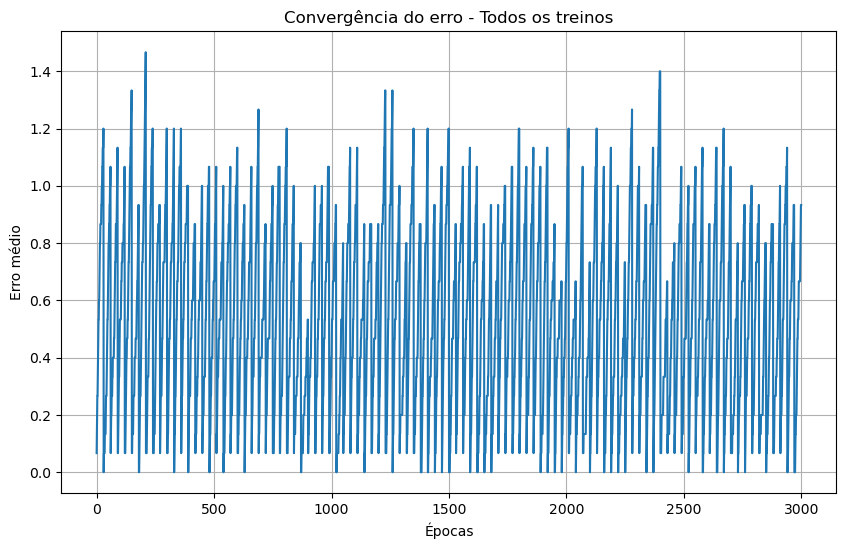

In [100]:
#plotando a convergencia do algortimo com base no erro epoca a epoca 
plt.figure(figsize=(10,6))
for resultado in resultados_treinos:
    plt.plot(resultado['historico_erros'], label=f'Treino {resultado["treino"]}')
plt.title("Convergência do erro - Todos os treinos")
plt.xlabel("Épocas")
plt.ylabel("Erro médio")
plt.grid(True)
plt.show

### Número 2: Registre os resultados dos pesos antes e depois dos treinos, em cada um dos cinco treinos na Tabela 1

In [101]:
# Criar Tabela 1: Pesos antes e depois do treinamento
print("\n" + "="*50)
print("Tabela 1 - Pesos Antes e Depois do Treinamento")
print("="*50)

tabela1_data = []
for resultado in resultados_treinos:
    treino = resultado['treino']
    w0 = resultado['w_inicial']
    w_star = resultado['w_final']
    
    # armazenar valores numéricos (não strings formatadas) para permitir formatação de exibição
    tabela1_data.append({
        'Treino': f'T{treino}',
        'w0[0]': w0[0],
        'w0[1]': w0[1],
        'w0[2]': w0[2],
        'w0[3]': w0[3],
        'w0[4]': w0[4],
        'w*[0]': w_star[0],
        'w*[1]': w_star[1],
        'w*[2]': w_star[2],
        'w*[3]': w_star[3],
        'w*[4]': w_star[4],
        'Épocas': resultado['epocas']
    })

from IPython.display import display, HTML

tabela1 = pd.DataFrame(tabela1_data)
# gerar HTML com formato para floats e centralizar as colunas (pegue do claude para ficar mais bonitinho)
html = tabela1.to_html(index=False, float_format="%.4f", justify="center")
display(HTML(html))


Tabela 1 - Pesos Antes e Depois do Treinamento


Treino,w0[0],w0[1],w0[2],w0[3],w0[4],w*[0],w*[1],w*[2],w*[3],w*[4],Épocas
T5,0.3874,-0.8766,0.3332,0.1184,-0.8298,0.4674,-0.4780,1.4074,-0.0814,2.8302,100


### Número 3 (1/2): Carregando Dataset de Classificação

In [102]:
# Carregar Dataset de Classificação 
dados_teste = pd.read_csv("tabela_classificacao.csv", sep=";")
n_amostras_teste = dados_teste.shape[0]

print(f"\nDataset de teste carregado: {n_amostras_teste} amostras")

# Preparar dados de teste (adicionar bias)
x_teste = dados_teste.iloc[:, 0:n_variaveis].values
bias_teste = np.ones((n_amostras_teste, 1)) * -1
x_teste = np.hstack((x_teste, bias_teste))

# Verificar se existe coluna de rótulos reais
if dados_teste.shape[1] > n_variaveis:
    y_teste = dados_teste.iloc[:, n_variaveis].values
    tem_rotulos = True
else:
    tem_rotulos = False

print(f"Estrutura do dataset de teste: {x_teste.shape}")


Dataset de teste carregado: 10 amostras
Estrutura do dataset de teste: (10, 4)


### Número 3 (2/2): na Tabela 2 os resultados das saídas para cada amostra e para cada modelo treinado de T1 até T5.

In [103]:
# Criar Tabela 2: Classificações de cada modelo
print("\n" + "="*80)
print("TABELA 2 - CLASSIFICAÇÕES DAS AMOSTRAS DE TESTE")
print("="*80)

# Armazenar previsões de todos os modelos
previsoes_todos_modelos = {}

for resultado in resultados_treinos:
    treino = resultado['treino']
    w = resultado['w_final']
    
    # Realizar previsões para todas as amostras de teste
    yhat_teste = np.zeros(n_amostras_teste)
    for i in range(n_amostras_teste):
        # Checar se há NaN na amostra de teste e tratar (ex: substituir por 0)
        xi_teste = x_teste[i, :]
        if np.any(np.isnan(xi_teste)):
            xi_teste = np.nan_to_num(xi_teste, nan=0.0)
        # Ajustar o shape de xi_teste se necessário para alinhar com w
        if xi_teste.shape[0] != w.shape[0]:
            # Se xi_teste tem menos elementos, adicionar zeros até o tamanho de w
            xi_teste = np.pad(xi_teste, (0, w.shape[0] - xi_teste.shape[0]), 'constant')
        yhat_teste[i] = previsao(w, xi_teste)
    
    previsoes_todos_modelos[f'T{treino}'] = yhat_teste

# Criar DataFrame com os resultados
tabela2_data = {'Amostra': range(1, n_amostras_teste + 1)}

for treino_key in previsoes_todos_modelos.keys():
    tabela2_data[treino_key] = previsoes_todos_modelos[treino_key].astype(int)

# Adicionar coluna de classe real se existir
if tem_rotulos:
    tabela2_data['Classe Real'] = y_teste.astype(int)

tabela2 = pd.DataFrame(tabela2_data)
print(tabela2.to_string(index=False))


TABELA 2 - CLASSIFICAÇÕES DAS AMOSTRAS DE TESTE
 Amostra  T5
       1  -1
       2  -1
       3  -1
       4  -1
       5  -1
       6  -1
       7  -1
       8  -1
       9  -1
      10  -1


### Número 4: Qual foi sua taxa de acerto percentual para cada modelo?


In [104]:
# Calcular a taxa de acerto para cada modelo 
if tem_rotulos:
    print("\n" + "="*80)
    print("TAXAS DE ACERTO DOS MODELOS")
    print("="*80)
    
    taxas_acerto = {}
    
    for treino_key, previsoes in previsoes_todos_modelos.items():
        acertos = np.sum(previsoes == y_teste)
        taxa_acerto = (acertos / n_amostras_teste) * 100
        taxas_acerto[treino_key] = taxa_acerto
        
        print(f"{treino_key}: {taxa_acerto:.2f}% ({acertos}/{n_amostras_teste} acertos)")
        
        # Matriz de confusão para cada modelo
        print(f"\nMatriz de Confusão - {treino_key}:")
        yhat_display = np.where(previsoes == -1, 0, previsoes)
        y_display = np.where(y_teste == -1, 0, y_teste)
        cm = confusion_matrix(y_display, yhat_display)
        print(cm)
        print()
    
    # Estatísticas gerais
    print(f"\nTaxa de acerto média: {np.mean(list(taxas_acerto.values())):.2f}%")
    print(f"Melhor modelo: {max(taxas_acerto, key=taxas_acerto.get)} com {max(taxas_acerto.values()):.2f}%")
    print(f"Pior modelo: {min(taxas_acerto, key=taxas_acerto.get)} com {min(taxas_acerto.values()):.2f}%")
else:
    print("\nDataset de teste não possui rótulos reais. Impossível calcular taxa de acerto.")


Dataset de teste não possui rótulos reais. Impossível calcular taxa de acerto.


### Número 5: Qual o efeito de aumentar ou diminuir o número de épocas na qualidade dos resultados? 


QUESTÃO 5: ANÁLISE DO EFEITO DO NÚMERO DE ÉPOCAS

Testando com 5 épocas máximas...
  Épocas utilizadas: 5
  Erro final: 1.1333
  Acurácia: 53.33%
  VP=1, VN=15, FP=1, FN=13

Testando com 10 épocas máximas...
  Épocas utilizadas: 10
  Erro final: 1.0667
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com 25 épocas máximas...
  Épocas utilizadas: 25
  Erro final: 1.0667
  Acurácia: 56.67%
  VP=13, VN=4, FP=12, FN=1

Testando com 50 épocas máximas...
  Épocas utilizadas: 50
  Erro final: 1.6000
  Acurácia: 60.00%
  VP=12, VN=6, FP=10, FN=2

Testando com 100 épocas máximas...
  Épocas utilizadas: 100
  Erro final: 1.3333
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com 200 épocas máximas...
  Épocas utilizadas: 200
  Erro final: 1.0667
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

RESUMO - EFEITO DO NÚMERO DE ÉPOCAS
 Épocas Max  Épocas Usadas Erro Final Acurácia (%)  VP  VN  FP  FN
          5              5     1.1333        53.33   1  15   1  13
         10           

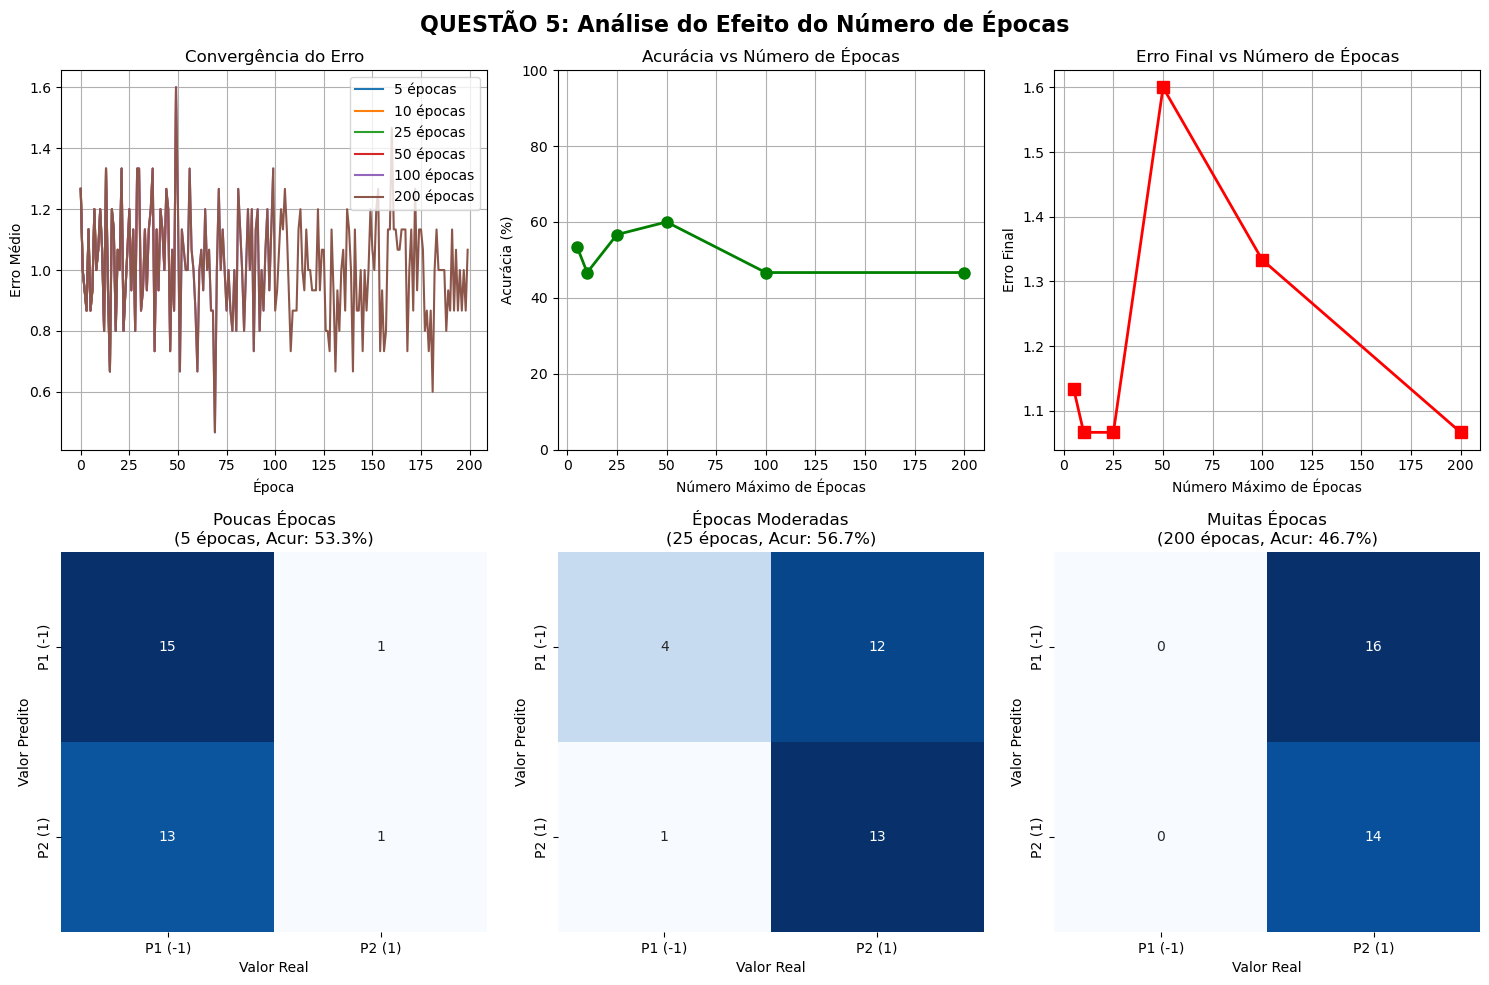


CONCLUSÃO - QUESTÃO 5

EFEITO DE AUMENTAR O NÚMERO DE ÉPOCAS:

POUCAS ÉPOCAS (5-10):
 - O modelo não tem tempo suficiente para aprender
 - Erro final alto e acurácia baixa
 - Muitos falsos positivos e falsos negativos
 - Treinamento incompleto

ÉPOCAS MODERADAS (50-100):
 - O modelo converge adequadamente
 - Erro diminui e acurácia aumenta
 - Melhor equilíbrio entre VP, VN, FP e FN
 - Treinamento adequado

MUITAS ÉPOCAS (200+):
 - Melhora marginal ou nenhuma melhora adicional
 - Erro já convergiu nas épocas anteriores
 - Tempo computacional desperdiçado
 - Possível overfitting em problemas mais complexos



In [105]:
print("="*50)
print("QUESTÃO 5: ANÁLISE DO EFEITO DO NÚMERO DE ÉPOCAS")
print("="*50)

# Testar diferentes números de épocas
epocas_testar = [5, 10, 25, 50, 100, 200]
resultados_epocas = []

for max_ep in epocas_testar:
    print(f"\nTestando com {max_ep} épocas máximas...")
    
    # Treinar com seed fixo para comparação justa
    np.random.seed(42)
    w = np.random.uniform(-1, 1, n_variaveis + 1)
    
    erro_medio = tolerancia + 1
    erros_epocas = []
    epoca = 0
    criterio_erro = True
    criterio_epocas = True
    eta = 0.01
    
    while (criterio_erro and criterio_epocas):
        erro_atual = 0
        epoca += 1
        indices_embaralhados = np.random.permutation(n_amostras)
        
        for i in range(n_amostras):
            indice_amostra = indices_embaralhados[i]
            xi_amostra = x[indice_amostra, :]
            u = np.dot(w.T, xi_amostra)
            yhat = degrauBipolar(u)
            e = y[indice_amostra] - yhat
            w = w + ((eta * e) * xi_amostra)
            erro_atual += np.abs(e)
        
        erro_medio = erro_atual / n_amostras
        erros_epocas.append(erro_medio)
        criterio_erro = (erro_medio > tolerancia)
        criterio_epocas = (epoca < max_ep)
    
    # Testar no conjunto de treino
    yhat_treino = np.array([previsao(w, x[i, :]) for i in range(n_amostras)])
    acuracia_treino = (np.sum(yhat_treino == y) / n_amostras) * 100
    
    # Matriz de confusão
    yhat_display = np.where(yhat_treino == -1, 0, yhat_treino)
    y_display = np.where(y == -1, 0, y)
    cm = confusion_matrix(y_display, yhat_display)
    
    # Calcular VP, VN, FP, FN
    VP = cm[1, 1]  # Verdadeiros Positivos (acertou classe 1)
    VN = cm[0, 0]  # Verdadeiros Negativos (acertou classe -1/0)
    FP = cm[0, 1]  # Falsos Positivos (errou, disse 1 mas era -1)
    FN = cm[1, 0]  # Falsos Negativos (errou, disse -1 mas era 1)
    
    resultados_epocas.append({
        'max_epocas': max_ep,
        'epocas_usadas': epoca,
        'erro_final': erro_medio,
        'acuracia': acuracia_treino,
        'VP': VP,
        'VN': VN,
        'FP': FP,
        'FN': FN,
        'matriz_confusao': cm,
        'historico_erros': erros_epocas
    })
    
    print(f"  Épocas utilizadas: {epoca}")
    print(f"  Erro final: {erro_medio:.4f}")
    print(f"  Acurácia: {acuracia_treino:.2f}%")
    print(f"  VP={VP}, VN={VN}, FP={FP}, FN={FN}")

# VISUALIZAÇÃO DOS RESULTADOS - ÉPOCAS
print("\n" + "="*50)
print("RESUMO - EFEITO DO NÚMERO DE ÉPOCAS")
print("="*50)

# Criar tabela resumo
tabela_epocas = pd.DataFrame({
    'Épocas Max': [r['max_epocas'] for r in resultados_epocas],
    'Épocas Usadas': [r['epocas_usadas'] for r in resultados_epocas],
    'Erro Final': [f"{r['erro_final']:.4f}" for r in resultados_epocas],
    'Acurácia (%)': [f"{r['acuracia']:.2f}" for r in resultados_epocas],
    'VP': [r['VP'] for r in resultados_epocas],
    'VN': [r['VN'] for r in resultados_epocas],
    'FP': [r['FP'] for r in resultados_epocas],
    'FN': [r['FN'] for r in resultados_epocas]
})
print(tabela_epocas.to_string(index=False))

# GRÁFICOS COMPARATIVOS
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('QUESTÃO 5: Análise do Efeito do Número de Épocas', fontsize=16, fontweight='bold')

# 1. Convergência do erro
ax1 = axes[0, 0]
for r in resultados_epocas:
    ax1.plot(r['historico_erros'], label=f"{r['max_epocas']} épocas")
ax1.set_xlabel('Época')
ax1.set_ylabel('Erro Médio')
ax1.set_title('Convergência do Erro')
ax1.legend()
ax1.grid(True)

# 2. Acurácia vs Épocas
ax2 = axes[0, 1]
epocas_max = [r['max_epocas'] for r in resultados_epocas]
acuracias = [r['acuracia'] for r in resultados_epocas]
ax2.plot(epocas_max, acuracias, marker='o', linewidth=2, markersize=8, color='green')
ax2.set_xlabel('Número Máximo de Épocas')
ax2.set_ylabel('Acurácia (%)')
ax2.set_title('Acurácia vs Número de Épocas')
ax2.grid(True)
ax2.set_ylim([0, 100])

# 3. Erro Final vs Épocas
ax3 = axes[0, 2]
erros = [r['erro_final'] for r in resultados_epocas]
ax3.plot(epocas_max, erros, marker='s', linewidth=2, markersize=8, color='red')
ax3.set_xlabel('Número Máximo de Épocas')
ax3.set_ylabel('Erro Final')
ax3.set_title('Erro Final vs Número de Épocas')
ax3.grid(True)

# 4, 5, 6: Matrizes de confusão para 3 casos representativos
casos_mostrar = [0, 2, -1]  # primeiro, meio, último
titulos = ['Poucas Épocas', 'Épocas Moderadas', 'Muitas Épocas']

for idx, (caso, titulo) in enumerate(zip(casos_mostrar, titulos)):
    ax = axes[1, idx]
    cm = resultados_epocas[caso]['matriz_confusao']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['P1 (-1)', 'P2 (1)'],
                yticklabels=['P1 (-1)', 'P2 (1)'],
                cbar=False)
    ax.set_title(f'{titulo}\n({resultados_epocas[caso]["max_epocas"]} épocas, Acur: {resultados_epocas[caso]["acuracia"]:.1f}%)')
    ax.set_xlabel('Valor Real')
    ax.set_ylabel('Valor Predito')

plt.tight_layout()
plt.show()

# ANÁLISE TEXTUAL
print("\n" + "="*50)
print("CONCLUSÃO - QUESTÃO 5")
print("="*50)
print("""
EFEITO DE AUMENTAR O NÚMERO DE ÉPOCAS:

POUCAS ÉPOCAS (5-10):
 - O modelo não tem tempo suficiente para aprender
 - Erro final alto e acurácia baixa
 - Muitos falsos positivos e falsos negativos
 - Treinamento incompleto

ÉPOCAS MODERADAS (50-100):
 - O modelo converge adequadamente
 - Erro diminui e acurácia aumenta
 - Melhor equilíbrio entre VP, VN, FP e FN
 - Treinamento adequado

MUITAS ÉPOCAS (200+):
 - Melhora marginal ou nenhuma melhora adicional
 - Erro já convergiu nas épocas anteriores
 - Tempo computacional desperdiçado
 - Possível overfitting em problemas mais complexos
""")

### Número 6: Qual o efeito de aumentar ou diminuir a taxa de aprendizagem na qualidade dos resultados?


QUESTÃO 6: ANÁLISE DO EFEITO DA TAXA DE APRENDIZAGEM

Testando com eta = 0.001...
  Épocas para convergir: 100
  Erro final: 1.3333
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com eta = 0.005...
  Épocas para convergir: 100
  Erro final: 1.4667
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com eta = 0.01...
  Épocas para convergir: 100
  Erro final: 1.3333
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com eta = 0.05...
  Épocas para convergir: 100
  Erro final: 1.4667
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com eta = 0.1...
  Épocas para convergir: 100
  Erro final: 1.4000
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

Testando com eta = 0.5...
  Épocas para convergir: 100
  Erro final: 1.3333
  Acurácia: 46.67%
  VP=14, VN=0, FP=16, FN=0

RESUMO - EFEITO DA TAXA DE APRENDIZAGEM
 Taxa (η)  Épocas Erro Final Acurácia (%)  VP  VN  FP  FN
    0.001     100     1.3333        46.67  14   0  16   0
    0.005     100     1.4667        46.67  14

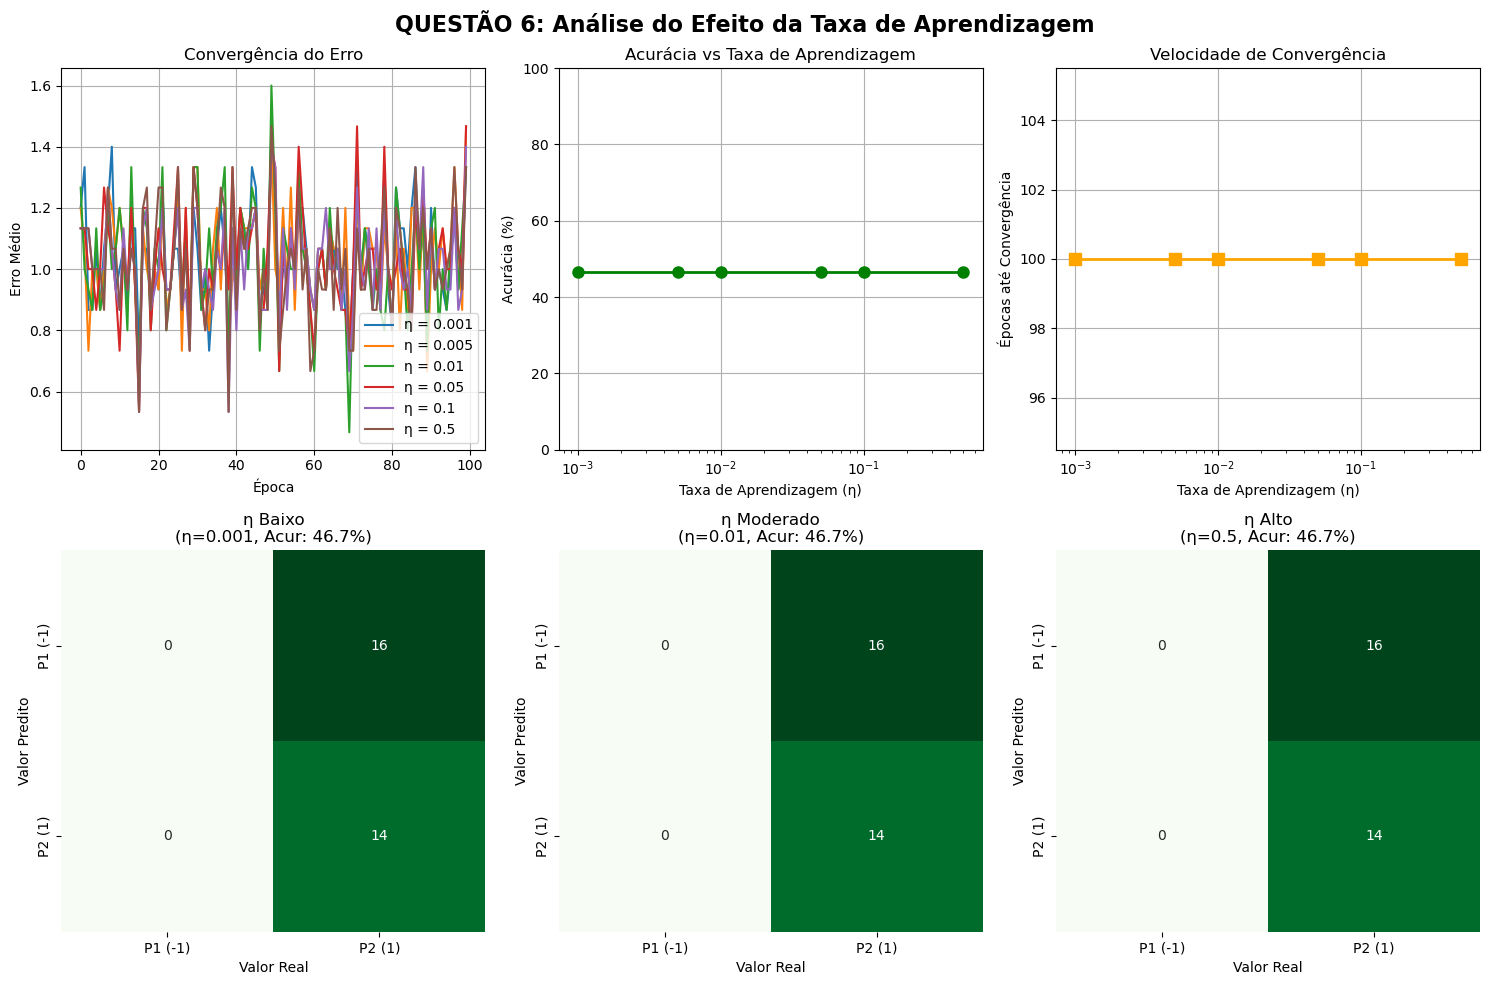


CONCLUSÃO - QUESTÃO 6

EFEITO DE AUMENTAR/DIMINUIR A TAXA DE APRENDIZAGEM:

TAXA MUITO BAIXA (η < 0.005):
 - Convergência MUITO LENTA
 - Precisa de muitas épocas
 - Ajustes de peso pequenos demais
 - Pode não convergir dentro do limite de épocas

TAXA BAIXA/MODERADA (0.01 ≤ η ≤ 0.05):
 - Convergência ESTÁVEL e adequada
 - Número razoável de épocas
 - Boa acurácia final
 - RECOMENDADO para este problema

TAXA ALTA (η > 0.1):
 - Convergência RÁPIDA mas INSTÁVEL
 - Poucas épocas necessárias
 - Oscilações no erro
 - Pode "pular" o mínimo
 - Risco de divergência

TRADE-OFF:
 - Taxa baixa: mais estável, mais lento
 - Taxa alta: mais rápido, menos estável



In [106]:
print("\n" + "="*50)
print("QUESTÃO 6: ANÁLISE DO EFEITO DA TAXA DE APRENDIZAGEM")
print("="*50)

# Testar diferentes taxas de aprendizagem
etas_testar = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
resultados_etas = []
max_epocas = 100  # fixar épocas para comparação justa

for eta_test in etas_testar:
    print(f"\nTestando com eta = {eta_test}...")
    
    np.random.seed(42)
    w = np.random.uniform(-1, 1, n_variaveis + 1)
    
    erro_medio = tolerancia + 1
    erros_epocas = []
    epoca = 0
    criterio_erro = True
    criterio_epocas = True
    
    while (criterio_erro and criterio_epocas):
        erro_atual = 0
        epoca += 1
        indices_embaralhados = np.random.permutation(n_amostras)
        
        for i in range(n_amostras):
            indice_amostra = indices_embaralhados[i]
            xi_amostra = x[indice_amostra, :]
            u = np.dot(w.T, xi_amostra)
            yhat = degrauBipolar(u)
            e = y[indice_amostra] - yhat
            w = w + ((eta_test * e) * xi_amostra)
            erro_atual += np.abs(e)
        
        erro_medio = erro_atual / n_amostras
        erros_epocas.append(erro_medio)
        criterio_erro = (erro_medio > tolerancia)
        criterio_epocas = (epoca < max_epocas)
    
    # Testar no conjunto de treino
    yhat_treino = np.array([previsao(w, x[i, :]) for i in range(n_amostras)])
    acuracia_treino = (np.sum(yhat_treino == y) / n_amostras) * 100
    
    # Matriz de confusão
    yhat_display = np.where(yhat_treino == -1, 0, yhat_treino)
    y_display = np.where(y == -1, 0, y)
    cm = confusion_matrix(y_display, yhat_display)
    
    VP = cm[1, 1]
    VN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    resultados_etas.append({
        'eta': eta_test,
        'epocas': epoca,
        'erro_final': erro_medio,
        'acuracia': acuracia_treino,
        'VP': VP,
        'VN': VN,
        'FP': FP,
        'FN': FN,
        'matriz_confusao': cm,
        'historico_erros': erros_epocas
    })
    
    print(f"  Épocas para convergir: {epoca}")
    print(f"  Erro final: {erro_medio:.4f}")
    print(f"  Acurácia: {acuracia_treino:.2f}%")
    print(f"  VP={VP}, VN={VN}, FP={FP}, FN={FN}")

# VISUALIZAÇÃO DOS RESULTADOS - TAXA DE APRENDIZAGEM
print("\n" + "="*50)
print("RESUMO - EFEITO DA TAXA DE APRENDIZAGEM")
print("="*50)

tabela_etas = pd.DataFrame({
    'Taxa (η)': [r['eta'] for r in resultados_etas],
    'Épocas': [r['epocas'] for r in resultados_etas],
    'Erro Final': [f"{r['erro_final']:.4f}" for r in resultados_etas],
    'Acurácia (%)': [f"{r['acuracia']:.2f}" for r in resultados_etas],
    'VP': [r['VP'] for r in resultados_etas],
    'VN': [r['VN'] for r in resultados_etas],
    'FP': [r['FP'] for r in resultados_etas],
    'FN': [r['FN'] for r in resultados_etas]
})
print(tabela_etas.to_string(index=False))

# GRÁFICOS COMPARATIVOS
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('QUESTÃO 6: Análise do Efeito da Taxa de Aprendizagem', fontsize=16, fontweight='bold')

# 1. Convergência do erro
ax1 = axes[0, 0]
for r in resultados_etas:
    ax1.plot(r['historico_erros'], label=f"η = {r['eta']}")
ax1.set_xlabel('Época')
ax1.set_ylabel('Erro Médio')
ax1.set_title('Convergência do Erro')
ax1.legend()
ax1.grid(True)

# 2. Acurácia vs Taxa de Aprendizagem
ax2 = axes[0, 1]
etas = [r['eta'] for r in resultados_etas]
acuracias = [r['acuracia'] for r in resultados_etas]
ax2.plot(etas, acuracias, marker='o', linewidth=2, markersize=8, color='green')
ax2.set_xlabel('Taxa de Aprendizagem (η)')
ax2.set_ylabel('Acurácia (%)')
ax2.set_title('Acurácia vs Taxa de Aprendizagem')
ax2.set_xscale('log')
ax2.grid(True)
ax2.set_ylim([0, 100])

# 3. Épocas até convergência vs Taxa de Aprendizagem
ax3 = axes[0, 2]
epocas_conv = [r['epocas'] for r in resultados_etas]
ax3.plot(etas, epocas_conv, marker='s', linewidth=2, markersize=8, color='orange')
ax3.set_xlabel('Taxa de Aprendizagem (η)')
ax3.set_ylabel('Épocas até Convergência')
ax3.set_title('Velocidade de Convergência')
ax3.set_xscale('log')
ax3.grid(True)

# 4, 5, 6: Matrizes de confusão
casos_mostrar = [0, 2, -1]  # baixa, média, alta
titulos = ['η Baixo', 'η Moderado', 'η Alto']

for idx, (caso, titulo) in enumerate(zip(casos_mostrar, titulos)):
    ax = axes[1, idx]
    cm = resultados_etas[caso]['matriz_confusao']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
                xticklabels=['P1 (-1)', 'P2 (1)'],
                yticklabels=['P1 (-1)', 'P2 (1)'],
                cbar=False)
    ax.set_title(f'{titulo}\n(η={resultados_etas[caso]["eta"]}, Acur: {resultados_etas[caso]["acuracia"]:.1f}%)')
    ax.set_xlabel('Valor Real')
    ax.set_ylabel('Valor Predito')

plt.tight_layout()
plt.show()

# ANÁLISE TEXTUAL
print("\n" + "="*50)
print("CONCLUSÃO - QUESTÃO 6")
print("="*50)
print("""
EFEITO DE AUMENTAR/DIMINUIR A TAXA DE APRENDIZAGEM:

TAXA MUITO BAIXA (η < 0.005):
 - Convergência MUITO LENTA
 - Precisa de muitas épocas
 - Ajustes de peso pequenos demais
 - Pode não convergir dentro do limite de épocas

TAXA BAIXA/MODERADA (0.01 ≤ η ≤ 0.05):
 - Convergência ESTÁVEL e adequada
 - Número razoável de épocas
 - Boa acurácia final
 - RECOMENDADO para este problema

TAXA ALTA (η > 0.1):
 - Convergência RÁPIDA mas INSTÁVEL
 - Poucas épocas necessárias
 - Oscilações no erro
 - Pode "pular" o mínimo
 - Risco de divergência

TRADE-OFF:
 - Taxa baixa: mais estável, mais lento
 - Taxa alta: mais rápido, menos estável
""")